<a href="https://colab.research.google.com/github/isi1993/DRRR/blob/main/MY_PORTFOLIO_PROJECT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

LOAD THE DATASET

In [ ]:
DATA = pd.read_csv('/content/Car_Sales_5000_dirty.csv')
DATA

,Manufacturer,Model,Unit Sales,Price,Year Resale Value,Retention %,Retention Value,Engine Size,Horsepower,HP Level,...,Length,Curb Weight,Latest Launch,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Acura,Integra,16919.0,"$21,500","$16,360",76%,GOOD,1.8,NaN,Medium HP,...,172.4,2.639,2/2/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,TL,39384.0,"$28,400","$19,875",70%,GOOD,3.2,225.0,Medium HP,...,192.9,3.517,6/3/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acura,RL,8588.0,"$42,000","$29,725",71%,GOOD,3.5,210.0,Medium HP,...,196.6,3.850,3/10/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,A4,20397.0,"$23,990","$22,255",93%,GOOD,1.8,150.0,Medium HP,...,178.0,2.998,10/8/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Audi,A6,18780.0,"$33,950","$23,555",69%,GOOD,2.8,200.0,Medium HP,...,192.0,3.561,8/9/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,Dodge,Durango,101323.0,"$26,310","$21,436",81%,NaN,5.2,NaN,Medium HP,...,193.5,4.394,6/27/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,Saturn,LW,8472.0,"$18,835","$13,700",73%,GOOD,NaN,137.0,Medium HP,...,190.4,3.075,8/5/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5147,Nissan,NaN,42643.0,"$13,499","$8,450",63%,POOR,1.8,126.0,Medium HP,...,177.5,2.593,8/31/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5148,Saab,9-5,9191.0,"$33,120","$22,789",69%,POOR,2.3,170.0,Medium HP,...,189.2,3.280,11/9/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DATA.shape

(5150, 26)

In [ ]:
# check for the column name
DATA.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Price', 'Year Resale Value',
       'Retention %', 'Retention Value', 'Engine Size', 'Horsepower',
       'HP Level', 'Vehicle_type', 'Fuel Efficiency', 'Power Perf Factor',
       'Fuel Capacity', 'Wheelbase', 'Width', 'Length', 'Curb Weight',
       'Latest Launch', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# drop the empty columns from  the dataframe
DATA.drop(['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25' ], axis=1, inplace=True)


In [ ]:
DATA.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Price', 'Year Resale Value',
       'Retention %', 'Retention Value', 'Engine Size', 'Horsepower',
       'HP Level', 'Vehicle_type', 'Fuel Efficiency', 'Power Perf Factor',
       'Fuel Capacity', 'Wheelbase', 'Width', 'Length', 'Curb Weight',
       'Latest Launch'],
      dtype='object')

In [ ]:
DATA['Length'].value_counts()

,count
Length,
186.3,126
189.2,97
190.4,95
163.3,67
200.0,66
...,...
199.7,29
191.9,29
188.5,29


In [ ]:
#v CHECK FOR DUPLICATE IN THE DATAFRAME
DATA.duplicated().sum()

np.int64(2303)

In [ ]:
# DataFrame with duplicated rows (keeps all duplicates)
df_duplicates = DATA[DATA.duplicated(keep=False)]


In [ ]:
#create a dataframe with the Duplcated rows
df_duplicates

,Manufacturer,Model,Unit Sales,Price,Year Resale Value,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,Power Perf Factor,Fuel Capacity,Wheelbase,Width,Length,Curb Weight,Latest Launch
1,Acura,TL,39384.0,"$28,400","$19,875",70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,91.370778,17.2,108.1,70.3,192.9,3.517,6/3/2011
2,Acura,RL,8588.0,"$42,000","$29,725",71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,91.389779,18.0,114.6,71.4,196.6,3.850,3/10/2011
4,Audi,A6,18780.0,"$33,950","$23,555",69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,84.565105,18.5,108.7,76.1,192.0,3.561,8/9/2011
5,Audi,A8,1380.0,"$62,000","$39,000",63%,POOR,4.2,310.0,High HP,Passenger,21.0,NaN,23.7,113.0,74.0,198.2,3.902,2/27/2012
6,BMW,323i,19747.0,"$26,990","$24,500",91%,GOOD,2.5,170.0,Medium HP,Passenger,26.0,71.191207,16.6,107.3,68.4,176.0,3.179,6/28/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,Dodge,Durango,101323.0,"$26,310","$21,436",81%,NaN,5.2,NaN,Medium HP,Car,17.0,92.854125,25.0,115.7,71.7,193.5,4.394,6/27/2012
5146,Saturn,LW,8472.0,"$18,835","$13,700",73%,GOOD,NaN,137.0,Medium HP,NaN,27.0,56.295243,13.1,106.5,69.0,190.4,3.075,8/5/2011
5147,Nissan,NaN,42643.0,"$13,499","$8,450",63%,POOR,1.8,126.0,Medium HP,Passenger,30.0,50.241978,13.2,99.8,67.3,177.5,2.593,8/31/2011
5148,Saab,9-5,9191.0,"$33,120","$22,789",69%,POOR,2.3,170.0,Medium HP,Passenger,23.0,73.503778,18.5,106.4,70.6,189.2,3.280,11/9/2012


In [ ]:
#CREATE THE MISSING VALUE DATAFRAME
df_missing = DATA[DATA.isna().any(axis=1)]


In [ ]:
df_missing

,Manufacturer,Model,Unit Sales,Price,Year Resale Value,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,Power Perf Factor,Fuel Capacity,Wheelbase,Width,Length,Curb Weight,Latest Launch
0,Acura,Integra,16919.0,"$21,500","$16,360",76%,GOOD,1.8,NaN,Medium HP,Passenger,28.0,58.280150,13.2,101.2,67.3,172.4,2.639,2/2/2012
3,NaN,A4,20397.0,"$23,990","$22,255",93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,62.777639,16.4,102.6,68.2,178.0,2.998,10/8/2011
5,Audi,A8,1380.0,"$62,000","$39,000",63%,POOR,4.2,310.0,High HP,Passenger,21.0,NaN,23.7,113.0,74.0,198.2,3.902,2/27/2012
7,BMW,328i,9231.0,"$33,400","$28,675",86%,GOOD,2.8,193.0,Medium HP,Passenger,24.0,81.877069,16.6,107.3,NaN,176.0,3.197,1/29/2012
8,BMW,528i,17527.0,"$38,900","$36,125",93%,GOOD,2.8,193.0,Medium HP,Passenger,25.0,83.998724,18.5,NaN,70.9,188.0,3.472,4/4/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,NaN,GS400,3334.0,"$46,305","$38,955",84%,GOOD,4.0,300.0,High HP,Passenger,21.0,125.013357,19.8,NaN,70.9,189.2,3.693,11/28/2012
5145,Dodge,Durango,101323.0,"$26,310","$21,436",81%,NaN,5.2,NaN,Medium HP,Car,17.0,92.854125,25.0,115.7,71.7,193.5,4.394,6/27/2012
5146,Saturn,LW,8472.0,"$18,835","$13,700",73%,GOOD,NaN,137.0,Medium HP,NaN,27.0,56.295243,13.1,106.5,69.0,190.4,3.075,8/5/2011
5147,Nissan,NaN,42643.0,"$13,499","$8,450",63%,POOR,1.8,126.0,Medium HP,Passenger,30.0,50.241978,13.2,99.8,67.3,177.5,2.593,8/31/2011


In [ ]:
# CHEACK FOR THE DATAFRAME SHAPE
DATA.shape

(5150, 19)

In [ ]:
# check for missing value in the dataframe
DATA.isnull().sum()

,0
Manufacturer,251
Model,258
Unit Sales,246
Price,277
Year Resale Value,304
Retention %,284
Retention Value,250
Engine Size,243
Horsepower,254
HP Level,296


In [ ]:
DATA.head()

,Manufacturer,Model,Unit Sales,Price,Year Resale Value,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,Power Perf Factor,Fuel Capacity,Wheelbase,Width,Length,Curb Weight,Latest Launch
0,Acura,Integra,16919.0,"$21,500","$16,360",76%,GOOD,1.8,NaN,Medium HP,Passenger,28.0,58.280150,13.2,101.2,67.3,172.4,2.639,2/2/2012
1,Acura,TL,39384.0,"$28,400","$19,875",70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,91.370778,17.2,108.1,70.3,192.9,3.517,6/3/2011
2,Acura,RL,8588.0,"$42,000","$29,725",71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,91.389779,18.0,114.6,71.4,196.6,3.850,3/10/2011
3,NaN,A4,20397.0,"$23,990","$22,255",93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,62.777639,16.4,102.6,68.2,178.0,2.998,10/8/2011
4,Audi,A6,18780.0,"$33,950","$23,555",69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,84.565105,18.5,108.7,76.1,192.0,3.561,8/9/2011


In [ ]:
DATA.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Price', 'Year Resale Value',
       'Retention %', 'Retention Value', 'Engine Size', 'Horsepower',
       'HP Level', 'Vehicle_type', 'Fuel Efficiency', 'Power Perf Factor',
       'Fuel Capacity', 'Wheelbase', 'Width', 'Length', 'Curb Weight',
       'Latest Launch'],
      dtype='object')

In [ ]:
#CREATE A NEW COLUMN IN FROM RETENTION BY REMOVING THE % SIGN
DATA["New_Retention"] = (DATA["Retention %"]
    .str.replace("%", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float))

In [ ]:
#CREATE A NEW COLUMN IN THE DATAFRAME FROM PRICE BY REMOVING THE $ SIGN

DATA["PRICE"] = (DATA["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float))

In [ ]:
#CREATE A NEW COLUMN IN THE DATAFRAME FROM YEAR RESALE VALUE  BY REMOVING THE $ SIGN

DATA["Resale Value"] = (
    DATA["Year Resale Value"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [ ]:
DATA.shape

(5150, 22)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       4899 non-null   object 
 1   Model              4892 non-null   object 
 2   Unit Sales         4904 non-null   float64
 3   Price              4873 non-null   object 
 4   Year Resale Value  4846 non-null   object 
 5   Retention %        4866 non-null   object 
 6   Retention Value    4900 non-null   object 
 7   Engine Size        4907 non-null   float64
 8   Horsepower         4896 non-null   float64
 9   HP Level           4854 non-null   object 
 10  Vehicle_type       4888 non-null   object 
 11  Fuel Efficiency    4867 non-null   float64
 12  Power Perf Factor  4882 non-null   float64
 13  Fuel Capacity      4890 non-null   float64
 14  Wheelbase          4868 non-null   float64
 15  Width              4883 non-null   float64
 16  Length             4895 

In [ ]:
DATA.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Price', 'Year Resale Value',
       'Retention %', 'Retention Value', 'Engine Size', 'Horsepower',
       'HP Level', 'Vehicle_type', 'Fuel Efficiency', 'Power Perf Factor',
       'Fuel Capacity', 'Wheelbase', 'Width', 'Length', 'Curb Weight',
       'Latest Launch', 'New_Retention', 'PRICE', 'Resale Value'],
      dtype='object')

# drop the column with specail characters

In [ ]:
# drop the empty columns from  the dataframe
DATA.drop(['Price', 'Year Resale Value' ], axis=1, inplace=True)

In [ ]:
DATA.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Retention %', 'Retention Value',
       'Engine Size', 'Horsepower', 'HP Level', 'Vehicle_type',
       'Fuel Efficiency', 'Power Perf Factor', 'Fuel Capacity', 'Wheelbase',
       'Width', 'Length', 'Curb Weight', 'Latest Launch', 'New_Retention',
       'PRICE', 'Resale Value'],
      dtype='object')

In [ ]:
DATA.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,Power Perf Factor,Fuel Capacity,Wheelbase,Width,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value
0,Acura,Integra,16919.0,76%,GOOD,1.8,NaN,Medium HP,Passenger,28.0,58.280150,13.2,101.2,67.3,172.4,2.639,2/2/2012,76.0,21500.0,16360.0
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,91.370778,17.2,108.1,70.3,192.9,3.517,6/3/2011,70.0,28400.0,19875.0
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,91.389779,18.0,114.6,71.4,196.6,3.850,3/10/2011,71.0,42000.0,29725.0
3,NaN,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,62.777639,16.4,102.6,68.2,178.0,2.998,10/8/2011,93.0,23990.0,22255.0
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,84.565105,18.5,108.7,76.1,192.0,3.561,8/9/2011,69.0,33950.0,23555.0


In [ ]:
DATA_filled = DATA.bfill()

In [ ]:
DATA_filled.isnull().sum()

,0
Manufacturer,0
Model,0
Unit Sales,0
Retention %,1
Retention Value,0
Engine Size,0
Horsepower,0
HP Level,1
Vehicle_type,0
Fuel Efficiency,0


In [ ]:
DATA_filled.dtypes

,0
Manufacturer,object
Model,object
Unit Sales,float64
Retention %,object
Retention Value,object
Engine Size,float64
Horsepower,float64
HP Level,object
Vehicle_type,object
Fuel Efficiency,float64


In [ ]:
DATA_filled["Latest Launch"] = pd.to_datetime(DATA_filled["Latest Launch"])


In [ ]:
DATA_filled.dtypes

,0
Manufacturer,object
Model,object
Unit Sales,float64
Retention %,object
Retention Value,object
Engine Size,float64
Horsepower,float64
HP Level,object
Vehicle_type,object
Fuel Efficiency,float64


In [ ]:
# Create a month column using a datetime column like 'Latest launch'
DATA_filled['Months'] = DATA_filled['Latest Launch'].dt.month_name()

In [ ]:
DATA_filled.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,...,Fuel Capacity,Wheelbase,Width,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value,Months
0,Acura,Integra,16919.0,76%,GOOD,1.8,225.0,Medium HP,Passenger,28.0,...,13.2,101.2,67.3,172.4,2.639,2012-02-02,76.0,21500.0,16360.0,February
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,...,17.2,108.1,70.3,192.9,3.517,2011-06-03,70.0,28400.0,19875.0,June
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,...,18.0,114.6,71.4,196.6,3.850,2011-03-10,71.0,42000.0,29725.0,March
3,Audi,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,...,16.4,102.6,68.2,178.0,2.998,2011-10-08,93.0,23990.0,22255.0,October
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,...,18.5,108.7,76.1,192.0,3.561,2011-08-09,69.0,33950.0,23555.0,August


In [ ]:
# Create a week day column
DATA_filled['Weekdays'] = DATA_filled['Latest Launch'].dt.day_name()


In [ ]:
DATA_filled.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,...,Wheelbase,Width,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value,Months,Weekdays
0,Acura,Integra,16919.0,76%,GOOD,1.8,225.0,Medium HP,Passenger,28.0,...,101.2,67.3,172.4,2.639,2012-02-02,76.0,21500.0,16360.0,February,Thursday
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,...,108.1,70.3,192.9,3.517,2011-06-03,70.0,28400.0,19875.0,June,Friday
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,...,114.6,71.4,196.6,3.850,2011-03-10,71.0,42000.0,29725.0,March,Thursday
3,Audi,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,...,102.6,68.2,178.0,2.998,2011-10-08,93.0,23990.0,22255.0,October,Saturday
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,...,108.7,76.1,192.0,3.561,2011-08-09,69.0,33950.0,23555.0,August,Tuesday


In [ ]:
# Create a day column
DATA_filled['Year'] = DATA_filled['Latest Launch'].dt.year

In [ ]:
DATA_filled.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,...,Width,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value,Months,Weekdays,Year
0,Acura,Integra,16919.0,76%,GOOD,1.8,225.0,Medium HP,Passenger,28.0,...,67.3,172.4,2.639,2012-02-02,76.0,21500.0,16360.0,February,Thursday,2012
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,...,70.3,192.9,3.517,2011-06-03,70.0,28400.0,19875.0,June,Friday,2011
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,...,71.4,196.6,3.850,2011-03-10,71.0,42000.0,29725.0,March,Thursday,2011
3,Audi,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,...,68.2,178.0,2.998,2011-10-08,93.0,23990.0,22255.0,October,Saturday,2011
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,...,76.1,192.0,3.561,2011-08-09,69.0,33950.0,23555.0,August,Tuesday,2011


In [ ]:
DATA_filled['Weekdays'].value_counts()

,count
Weekdays,
Monday,855
Tuesday,807
Friday,795
Saturday,727
Sunday,672
Wednesday,672
Thursday,622


In [ ]:
DATA_filled['PRICE'].value_counts()

,count
PRICE,
12640.0,67
18890.0,65
38900.0,62
22505.0,42
41000.0,42
...,...
74970.0,30
21610.0,29
69700.0,29


In [ ]:
DATA_filled.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,...,Width,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value,Months,Weekdays,Year
0,Acura,Integra,16919.0,76%,GOOD,1.8,225.0,Medium HP,Passenger,28.0,...,67.3,172.4,2.639,2012-02-02,76.0,21500.0,16360.0,February,Thursday,2012
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,...,70.3,192.9,3.517,2011-06-03,70.0,28400.0,19875.0,June,Friday,2011
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,...,71.4,196.6,3.850,2011-03-10,71.0,42000.0,29725.0,March,Thursday,2011
3,Audi,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,...,68.2,178.0,2.998,2011-10-08,93.0,23990.0,22255.0,October,Saturday,2011
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,...,76.1,192.0,3.561,2011-08-09,69.0,33950.0,23555.0,August,Tuesday,2011


In [ ]:
DATA_filled.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Retention %', 'Retention Value',
       'Engine Size', 'Horsepower', 'HP Level', 'Vehicle_type',
       'Fuel Efficiency', 'Power Perf Factor', 'Fuel Capacity', 'Wheelbase',
       'Width', 'Length', 'Curb Weight', 'Latest Launch', 'New_Retention',
       'PRICE', 'Resale Value', 'Months', 'Weekdays', 'Year'],
      dtype='object')

In [ ]:
DATA_filled['Unit Sales'].value_counts()

,count
Unit Sales,
13798.0,41
76034.0,39
42574.0,39
32775.0,38
17947.0,38
...,...
28976.0,29
3493.0,29
80620.0,29


In [ ]:
DATA_filled['New_Retention'].value_counts()

,count
New_Retention,
61.0,324
66.0,294
70.0,292
63.0,244
84.0,206
62.0,203
65.0,201
55.0,190
56.0,169


In [ ]:
DATA_filled.columns

Index(['Manufacturer', 'Model', 'Unit Sales', 'Retention %', 'Retention Value',
       'Engine Size', 'Horsepower', 'HP Level', 'Vehicle_type',
       'Fuel Efficiency', 'Power Perf Factor', 'Fuel Capacity', 'Wheelbase',
       'Width', 'Length', 'Curb Weight', 'Latest Launch', 'New_Retention',
       'PRICE', 'Resale Value', 'Months', 'Weekdays', 'Year'],
      dtype='object')

In [ ]:
DATA_filled['Revenue'] = DATA_filled['Unit Sales'] * DATA_filled['PRICE']

In [ ]:
DATA_filled.head()

,Manufacturer,Model,Unit Sales,Retention %,Retention Value,Engine Size,Horsepower,HP Level,Vehicle_type,Fuel Efficiency,...,Length,Curb Weight,Latest Launch,New_Retention,PRICE,Resale Value,Months,Weekdays,Year,Revenue
0,Acura,Integra,16919.0,76%,GOOD,1.8,225.0,Medium HP,Passenger,28.0,...,172.4,2.639,2012-02-02,76.0,21500.0,16360.0,February,Thursday,2012,3.637585e+08
1,Acura,TL,39384.0,70%,GOOD,3.2,225.0,Medium HP,Passenger,25.0,...,192.9,3.517,2011-06-03,70.0,28400.0,19875.0,June,Friday,2011,1.118506e+09
2,Acura,RL,8588.0,71%,GOOD,3.5,210.0,Medium HP,Passenger,22.0,...,196.6,3.850,2011-03-10,71.0,42000.0,29725.0,March,Thursday,2011,3.606960e+08
3,Audi,A4,20397.0,93%,GOOD,1.8,150.0,Medium HP,Passenger,27.0,...,178.0,2.998,2011-10-08,93.0,23990.0,22255.0,October,Saturday,2011,4.893240e+08
4,Audi,A6,18780.0,69%,GOOD,2.8,200.0,Medium HP,Passenger,22.0,...,192.0,3.561,2011-08-09,69.0,33950.0,23555.0,August,Tuesday,2011,6.375810e+08


In [ ]:
DATA_filled['Revenue'].describe()

,Revenue
count,5.150000e+03
mean,1.157299e+09
std,1.540756e+09
min,2.749670e+06
25%,3.721243e+08
50%,6.987035e+08
75%,1.435836e+09
max,1.583183e+10


In [ ]:
monthly_revenue = DATA_filled['Months'].value_counts()


<Axes: xlabel='Weekdays'>

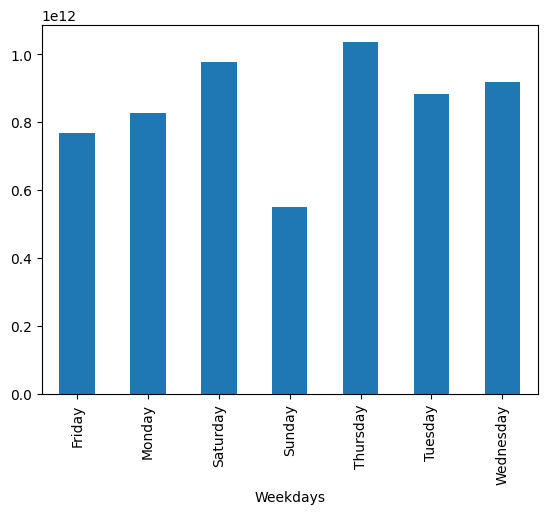

In [ ]:
# visualise the monthly revenue
DATA_filled.groupby('Weekdays')['Revenue'].sum().plot(kind='bar')


<Axes: xlabel='Months'>

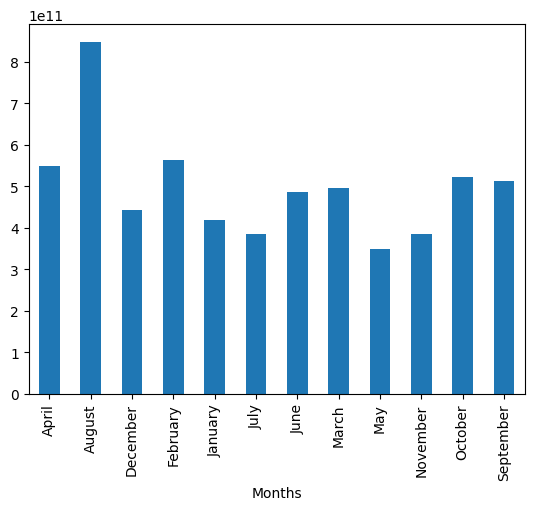

In [ ]:
# visualise the monthly revenue
DATA_filled.groupby('Months')['Revenue'].sum().plot(kind='bar')


In [ ]:
DATA_filled['PRICE'].describe()

,PRICE
count,5150.000000
mean,27455.183301
std,14302.969444
min,9235.000000
25%,17890.000000
50%,23400.000000
75%,31965.000000
max,85500.000000


In [ ]:
# calculate the average price
average_price = DATA_filled['PRICE'].mean()

In [ ]:
average_price

np.float64(27455.183300970875)

In [ ]:
DATA_filled['Year'].unique()

array([2012, 2011, 2008, 2009], dtype=int32)

In [ ]:
DATA_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Manufacturer       5150 non-null   object        
 1   Model              5150 non-null   object        
 2   Unit Sales         5150 non-null   float64       
 3   Retention %        5149 non-null   object        
 4   Retention Value    5150 non-null   object        
 5   Engine Size        5150 non-null   float64       
 6   Horsepower         5150 non-null   float64       
 7   HP Level           5149 non-null   object        
 8   Vehicle_type       5150 non-null   object        
 9   Fuel Efficiency    5150 non-null   float64       
 10  Power Perf Factor  5150 non-null   float64       
 11  Fuel Capacity      5150 non-null   float64       
 12  Wheelbase          5150 non-null   float64       
 13  Width              5150 non-null   float64       
 14  Length  

In [ ]:
# convert column from int to object
DATA_filled["Year"] = DATA_filled["Year"].astype("object")


In [ ]:
DATA_filled[['Revenue', 'Year']].value_counts()

,,count
Revenue,Year,
4.387897e+08,2012,34
1.454389e+08,2011,34
9.610698e+08,2011,33
7.090649e+08,2011,33
7.463667e+07,2011,33
...,...,...
4.187459e+09,2012,1
8.297611e+09,2012,1
1.989368e+07,2011,1


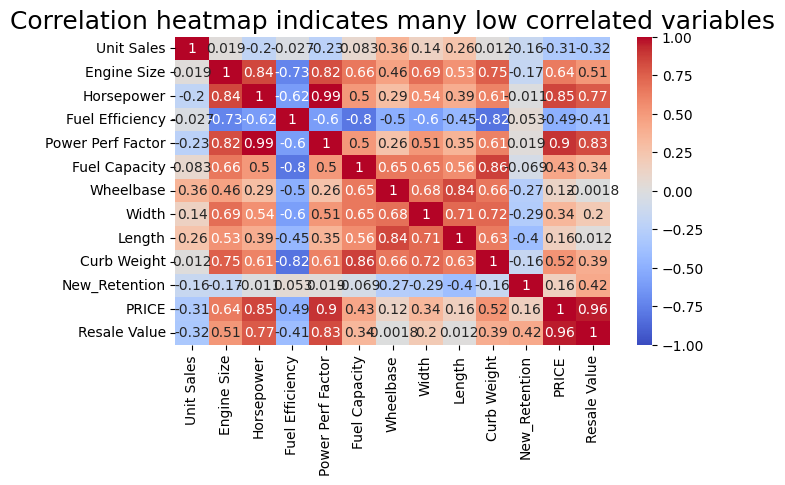

In [ ]:
# Plot correlation heatmap
### YOUR CODE HERE ###
# Plot correlation heatmap
plt.figure(figsize=(7,4))
sns.heatmap(DATA.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();